In [2]:
import pandas as pd
import numpy as np
import json
import gmaps
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import requests
from scipy.stats import linregress
import matplotlib.cm as cm
from scipy.stats import norm
import statistics

#from census import Census

import statsmodels.api as sm
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

# metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [7]:
path = "CSV statistics/QB_2020.csv"
qb2020 = pd.read_csv(path)
qb2020

,Rank,Player,CMP,ATT,PCT,YDS,Y/A,TD,INT,SACKS,ATT.1,YDS.1,TD.1,FL,G,FPTS,FPTS/G,OWN
0,1.0,Josh Allen (BUF),396.0,572.0,69.2,"4,544",7.9,37.0,10.0,26.0,102.0,421,8.0,6.0,16.0,405.7,25.4,99.8%
1,2.0,Kyler Murray (ARI),375.0,558.0,67.2,"3,971",7.1,26.0,12.0,27.0,133.0,819,11.0,4.0,16.0,390.7,24.4,99.6%
2,3.0,Aaron Rodgers (GB),372.0,526.0,70.7,"4,299",8.2,48.0,5.0,20.0,38.0,149,3.0,2.0,16.0,387.6,24.2,96.3%
3,4.0,Patrick Mahomes II (KC),390.0,588.0,66.3,"4,740",8.1,38.0,6.0,22.0,62.0,308,2.0,2.0,15.0,380.3,25.4,99.8%
4,5.0,Deshaun Watson (HOU),382.0,544.0,70.2,"4,823",8.9,33.0,7.0,49.0,90.0,444,3.0,3.0,16.0,376.4,23.5,47.7%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,143.0,Matt Schaub (FA),0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,3.0,-4,0.0,0.0,1.0,-0.4,-0.4,0.0%
143,144.0,Nate Sudfeld (SF),5.0,12.0,41.7,32,2.7,0.0,1.0,2.0,2.0,12,0.0,1.0,1.0,-0.5,-0.5,0.0%
144,145.0,Tim Boyle (DET),0.0,0.0,0.0,0,0.0,0.0,0.0,1.0,13.0,-9,0.0,0.0,8.0,-0.9,-0.1,0.1%
145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# clean = qb2020.ATT
# quartiles = clean.quantile([.25,.5,.75])
# lowerq = quartiles[0.25]
# upperq = quartiles[0.75]
# iqr = upperq-lowerq



# lower_bound = lowerq - (1.5*iqr)
# upper_bound = upperq + (1.5*iqr)
# print(f"Values below {lower_bound} could be outliers.")
# print(f"Values above {upper_bound} could be outliers.")

mask = qb2020.ATT > 100
qb2020 = qb2020[mask]

In [13]:
qb2020.describe()

,Rank,CMP,ATT,PCT,Y/A,TD,INT,SACKS,ATT.1,TD.1,FL,G,FPTS,FPTS/G
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,10.947368,364.052632,544.631579,66.805263,7.600000,29.947368,9.894737,29.947368,54.263158,3.210526,3.157895,15.631579,315.826316,20.168421
std,6.720398,35.556643,48.472456,2.278760,0.599073,9.082790,2.378018,10.389491,29.744919,2.935964,2.061907,0.597265,62.279307,3.722014
min,1.000000,280.000000,448.000000,62.500000,6.300000,11.000000,5.000000,13.000000,18.000000,0.000000,1.000000,14.000000,190.200000,13.600000
25%,5.500000,344.000000,516.500000,65.550000,7.300000,26.000000,8.500000,22.500000,31.000000,1.000000,1.000000,15.000000,263.400000,16.900000
50%,11.000000,372.000000,544.000000,67.000000,7.600000,31.000000,10.000000,26.000000,51.000000,3.000000,3.000000,16.000000,319.200000,20.000000
75%,16.000000,393.000000,580.000000,68.400000,7.900000,36.000000,11.500000,38.500000,63.500000,4.500000,4.000000,16.000000,374.500000,23.400000
max,24.000000,407.000000,626.000000,70.700000,8.900000,48.000000,13.000000,49.000000,133.000000,11.000000,8.000000,16.000000,405.700000,25.400000


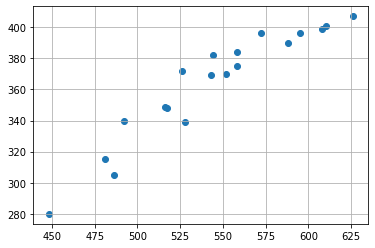

In [14]:
plt.scatter(qb2020.ATT,qb2020.CMP)
plt.grid()
plt.show()

In [23]:
feature = qb2020[['CMP','ATT','INT','Y/A']]
target = qb2020['TD']

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

C:\Users\Greyson\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     TD   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     3.982
Date:                Tue, 03 Aug 2021   Prob (F-statistic):             0.0232
Time:                        22:43:40   Log-Likelihood:                -61.151
No. Observations:                  19   AIC:                             132.3
Df Residuals:                      14   BIC:                             137.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -42.6103     39.569     -1.077      0.300    -127.478      42.257
CMP            0.1459      0.182      0.802      0.436      -0.244       0.536
ATT           -0.0027      0.132     -0.021      0.984      -0.286       0.281
INT           -1.1535      0.784     -1.471      0.163      -2.835       0.528
Y/A            4.2563      3.853      1.105      0.288      -4.008      12.521
==============================================================================
Omnibus:                        1.298   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.523   Jarque-Bera (JB):                0.875
Skew:                           0.148   Prob(JB):                        0.646
Kurtosis:                       1.991   Cond. No.                     1.62e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<ipython-input-34-f85eeda05ca8>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


KeyError: 9

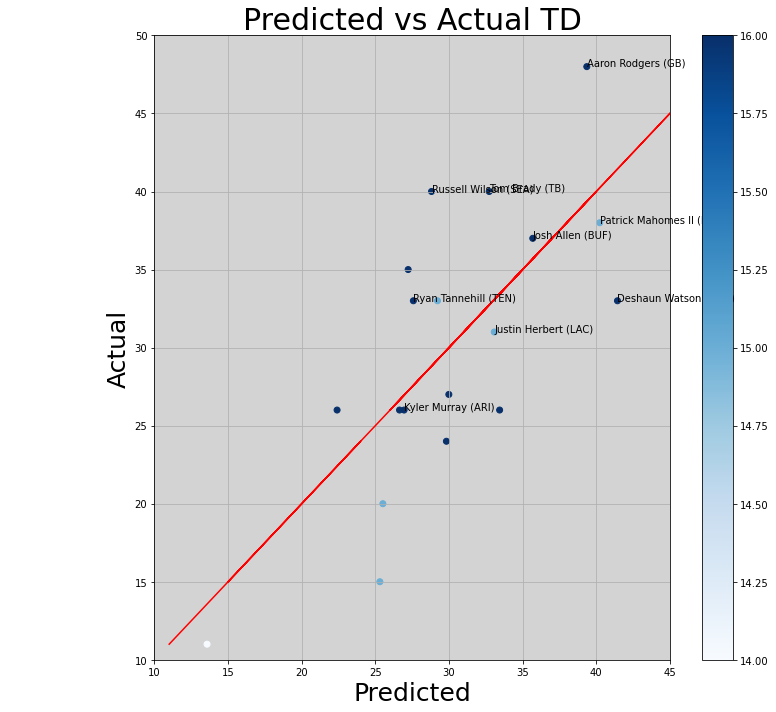

In [34]:
plt.figure(figsize=(10,10))
weight = qb2020.G
plt.scatter(results.fittedvalues, qb2020.TD,marker="o",c= weight,cmap='Blues')

plt.xlim(10,45)
plt.ylim(10,50)
plt.xlabel("Predicted",fontsize=25)
plt.ylabel("Actual",fontsize=25)
plt.title("Predicted vs Actual TD",fontsize=30)
plt.plot(qb2020.TD, qb2020.TD,color='red')
plt.tight_layout()
plt.annotate(f'R squared is: {results.rsquared}',(0,40),fontsize=15)
plt.grid()
plt.colorbar()
ax = plt.axes()
ax.set(facecolor='lightgray')

n = qb2020.Player

for i, txt in enumerate(n):
    plt.annotate(txt, (results.fittedvalues[i], qb2020.TD[i]))

plt.tight_layout()
plt.show()